In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1)
sns.set_style("white")

In [2]:
user_df = pd.read_feather("./datasets/raw/user.feather")
user_interest_df = pd.read_feather("./datasets/raw/user_interest.feather")
video_df = pd.read_feather("./datasets/raw/video.feather")
vote_df = pd.read_feather("./datasets/raw/vote.feather")
season_df = pd.read_feather("./datasets/raw/season.feather")
conversation_df = pd.read_feather("./datasets/raw/conversation.feather")
conversation_like_df = pd.read_feather("./datasets/raw/conversation_like.feather")

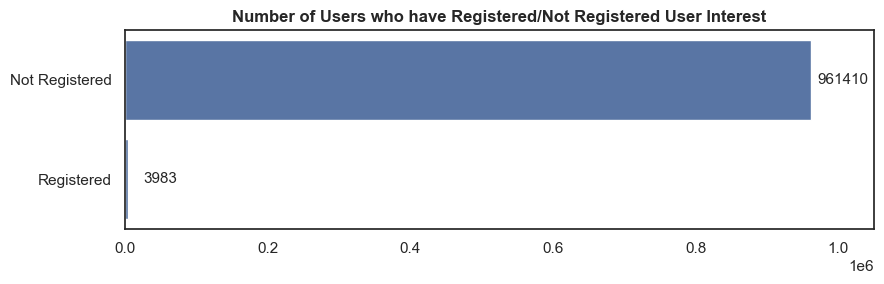

In [3]:
user_df["Interest Registered"] = np.where(user_df["id"].isin(user_interest_df["user_id"]), "Registered", "Not Registered")

fig, ax = plt.subplots(figsize=(9, 3))

sns.countplot(data=user_df, y=user_df["Interest Registered"])

for p in ax.patches:
    if not p.get_width() == 0:
        width = p.get_width()  # Get the width of the bar
        height = p.get_height()  # Get the height of the bar
        x, y = p.get_xy()  # Get the x and y coordinates of the bar
        ax.annotate(f"{int(width)}", (x + width + 45000, y + height / 1.8), ha="center", fontsize=11)

plt.title("Number of Users who have Registered/Not Registered User Interest", fontsize=12, fontweight="bold")
plt.ylabel("")
plt.xlabel("")
plt.xlim(0, 1_050_000)

plt.tight_layout()
plt.show()

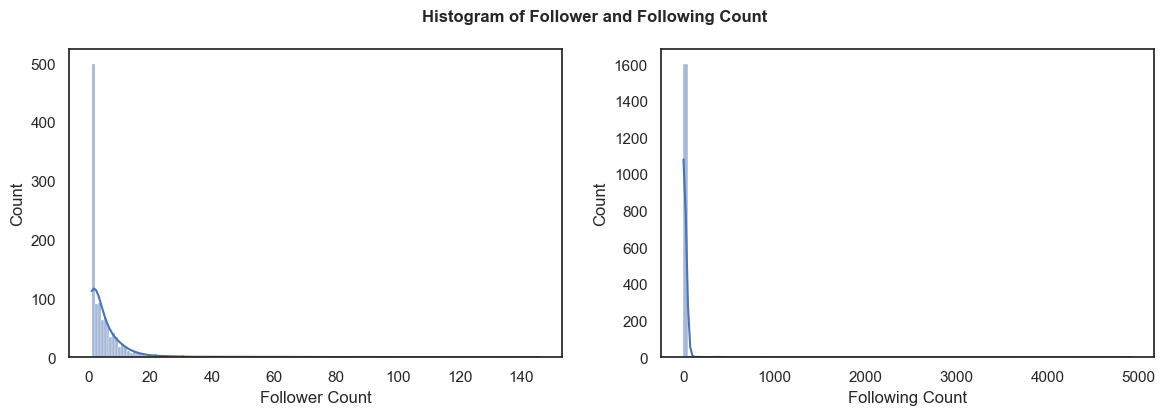

In [4]:
user_df["follower_count"] = user_df["follower_count"].fillna(0)
user_df["following_count"] = user_df["following_count"].fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(user_df[user_df["follower_count"] > 0]["follower_count"], kde=True, ax=axes[0])
sns.histplot(user_df[user_df["following_count"] > 0]["following_count"], kde=True, bins=100, ax=axes[1])

fig.suptitle("Histogram of Follower and Following Count", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Follower Count")
axes[1].set_xlabel("Following Count")

plt.show()

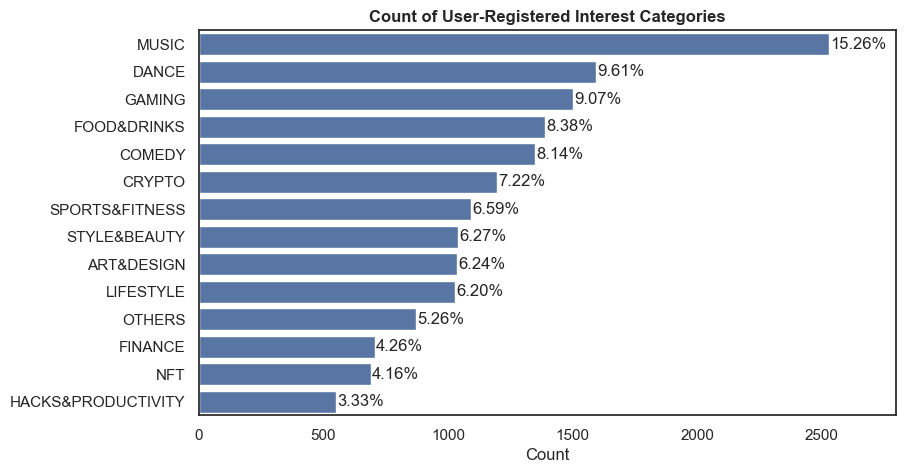

In [5]:
pivoted_user_interest_df = user_interest_df.pivot_table(index="user_id", columns="name", aggfunc="size", fill_value=0)
user_interest_sum = pivoted_user_interest_df.sum(axis=0).sort_values(ascending=False)
percentage = (user_interest_sum / user_interest_sum.sum()) * 100

fig, ax = plt.subplots(figsize=(9,5))

sns.barplot(y=user_interest_sum.index, x=user_interest_sum.values)

for i, p in enumerate(percentage):
    ax.text(user_interest_sum.values[i] + 5, i, f'{p:.2f}%', va='center')

plt.title("Count of User-Registered Interest Categories", fontsize=12, fontweight="bold")
plt.ylabel("")
plt.xlabel("Count")
plt.xlim(0, 2800)

plt.show()

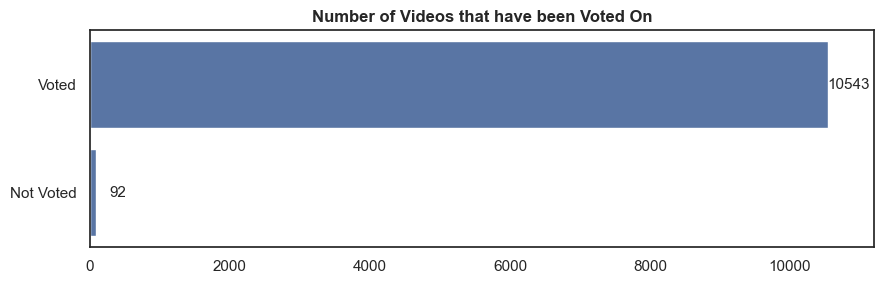

In [6]:
video_df["Voted On"] = np.where(video_df["id"].isin(vote_df["video_id"]), "Voted", "Not Voted")

fig, ax = plt.subplots(figsize=(9, 3))

sns.countplot(data=video_df, y=video_df["Voted On"])

for p in ax.patches:
    if not p.get_width() == 0:
        width = p.get_width()  # Get the width of the bar
        height = p.get_height()  # Get the height of the bar
        x, y = p.get_xy()  # Get the x and y coordinates of the bar
        ax.annotate(f"{int(width)}", (x + width + 300, y + height / 1.8), ha="center", fontsize=11)

plt.title("Number of Videos that have been Voted On", fontsize=12, fontweight="bold")
plt.ylabel("")
plt.xlabel("")
plt.xlim(0, 11200)

plt.tight_layout()
plt.show()

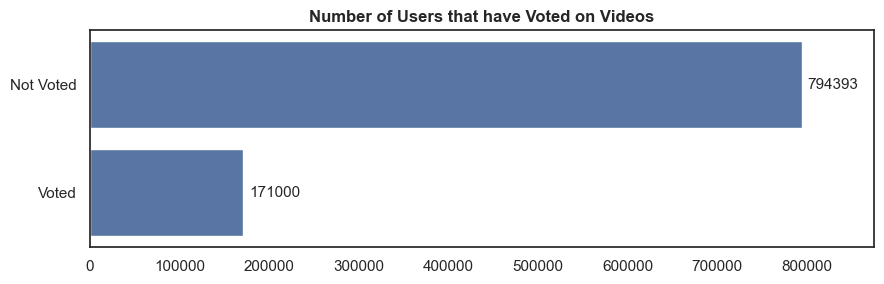

In [7]:
user_df["Voted"] = np.where(user_df["id"].isin(vote_df["voter_id"]), "Voted", "Not Voted")

fig, ax = plt.subplots(figsize=(9, 3))

sns.countplot(data=user_df, y=user_df["Voted"])

for p in ax.patches:
    if not p.get_width() == 0:
        width = p.get_width()  # Get the width of the bar
        height = p.get_height()  # Get the height of the bar
        x, y = p.get_xy()  # Get the x and y coordinates of the bar
        ax.annotate(f"{int(width)}", (x + width + 35000, y + height / 1.8), ha="center", fontsize=11)

plt.title("Number of Users that have Voted on Videos", fontsize=12, fontweight="bold")
plt.ylabel("")
plt.xlabel("")
plt.xlim(0, 875000)

plt.tight_layout()
plt.show()

In [8]:
voted_video_count_df = vote_df.groupby("video_id").agg({"voter_id": "count"})
video_df = video_df.set_index("id")
video_df["Vote Count"] = voted_video_count_df["voter_id"]
video_df = video_df.reset_index()
video_df["Vote Count"] = video_df["Vote Count"].fillna(0)

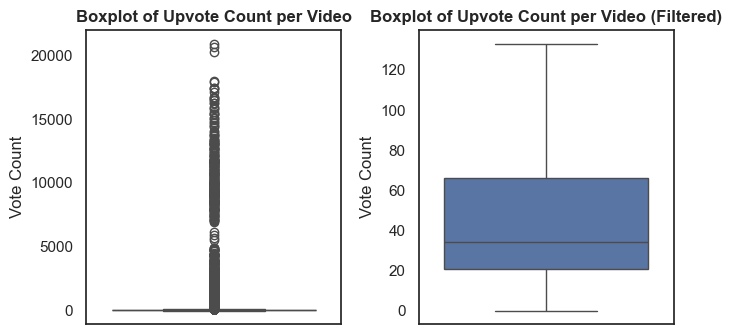

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))

sns.boxplot(video_df["Vote Count"], ax=axes[0])
sns.boxplot(video_df["Vote Count"], showfliers=False, ax=axes[1])

axes[0].set_title("Boxplot of Upvote Count per Video", fontsize=12, fontweight="bold")
axes[1].set_title("Boxplot of Upvote Count per Video (Filtered)", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

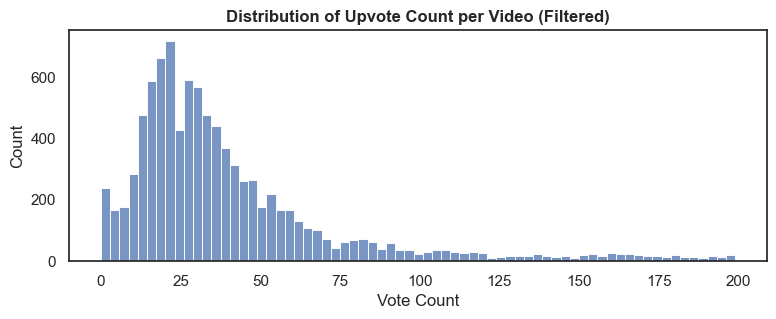

In [10]:
fig, ax = plt.subplots(figsize=(9,3))

sns.histplot(video_df[video_df["Vote Count"] < 200]["Vote Count"])
plt.title("Distribution of Upvote Count per Video (Filtered)", fontsize=12, fontweight="bold")

plt.show()

In [11]:
# video_df = video_df.merge(season_df[["id", "category"]], how="left", left_on="season_id", right_on="id")
vote_category_count = video_df.groupby("category").agg({"Vote Count": "sum"}).sort_values(by="Vote Count", ascending=False)
vote_percentage = (vote_category_count / vote_category_count.sum()) * 100

fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(data=vote_category_count, y=vote_category_count.index, x=vote_category_count["Vote Count"])

for index, row in vote_percentage.iterrows():
    p = row["Vote Count"]
    ax.text(vote_category_count.loc[index].squeeze() + 1000, index, f'{p:.2f}%', va='center')

plt.title("Vote Distribution by Category", fontsize=12, fontweight="bold")
plt.ylabel("")
plt.xlim(0, 1_500_000)

plt.show()

KeyError: 'category'

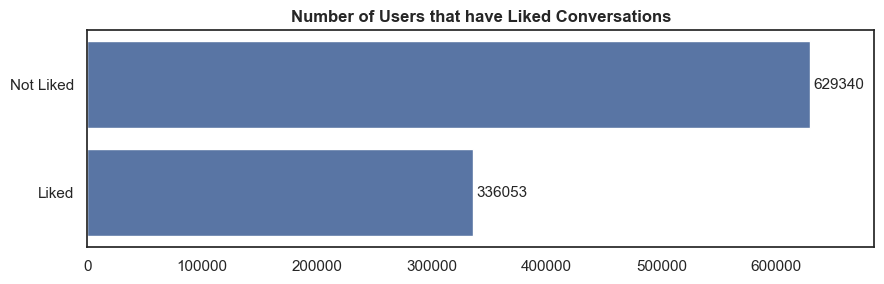

In [ ]:
user_df["Liked"] = np.where(user_df["id"].isin(conversation_like_df["like_giver_id"]), "Liked", "Not Liked")

fig, ax = plt.subplots(figsize=(9, 3))

sns.countplot(data=user_df, y=user_df["Liked"])

for p in ax.patches:
    if not p.get_width() == 0:
        width = p.get_width()  # Get the width of the bar
        height = p.get_height()  # Get the height of the bar
        x, y = p.get_xy()  # Get the x and y coordinates of the bar
        ax.annotate(f"{int(width)}", (x + width + 25000, y + height / 1.8), ha="center", fontsize=11)

plt.title("Number of Users that have Liked Conversations", fontsize=12, fontweight="bold")
plt.ylabel("")
plt.xlabel("")
plt.xlim(0, 685000)

plt.tight_layout()
plt.show()

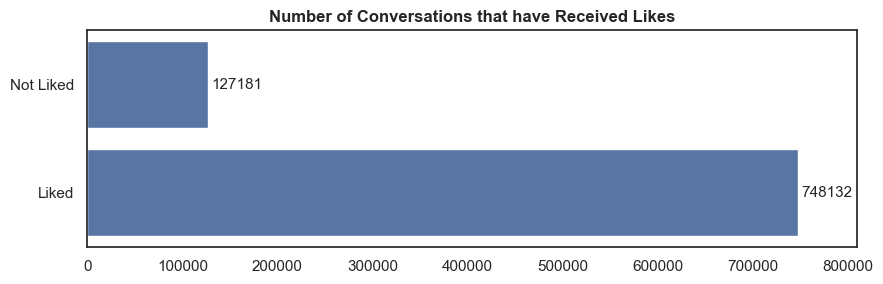

In [ ]:
conversation_df["Liked"] = np.where(conversation_df["id"].isin(conversation_like_df["conversation_id"]), "Liked", "Not Liked")

fig, ax = plt.subplots(figsize=(9, 3))

sns.countplot(data=conversation_df, y=conversation_df["Liked"])

for p in ax.patches:
    if not p.get_width() == 0:
        width = p.get_width()  # Get the width of the bar
        height = p.get_height()  # Get the height of the bar
        x, y = p.get_xy()  # Get the x and y coordinates of the bar
        ax.annotate(f"{int(width)}", (x + width + 30000, y + height / 1.8), ha="center", fontsize=11)

plt.title("Number of Conversations that have Received Likes", fontsize=12, fontweight="bold")
plt.ylabel("")
plt.xlabel("")
plt.xlim(0, 810000)

plt.tight_layout()
plt.show()

In [ ]:
liked_conversation_count_df = conversation_like_df.groupby("conversation_id").agg({"activity_id": "count"})
conversation_df = conversation_df.set_index("id")
conversation_df["Like Count"] = liked_conversation_count_df["activity_id"]
conversation_df = conversation_df.reset_index()
conversation_df["Like Count"] = conversation_df["Like Count"].fillna(0)

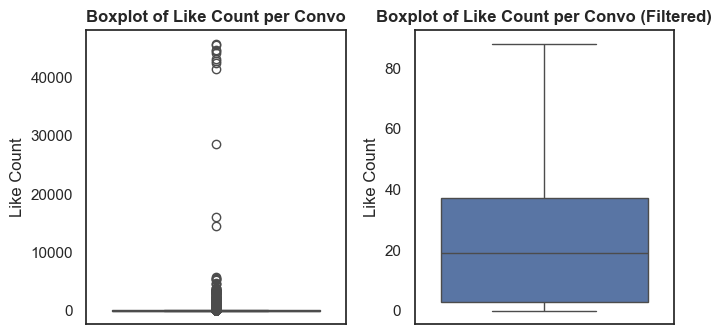

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))

sns.boxplot(conversation_df["Like Count"], ax=axes[0])
sns.boxplot(conversation_df["Like Count"], showfliers=False, ax=axes[1])

axes[0].set_title("Boxplot of Like Count per Convo", fontsize=12, fontweight="bold")
axes[1].set_title("Boxplot of Like Count per Convo (Filtered)", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

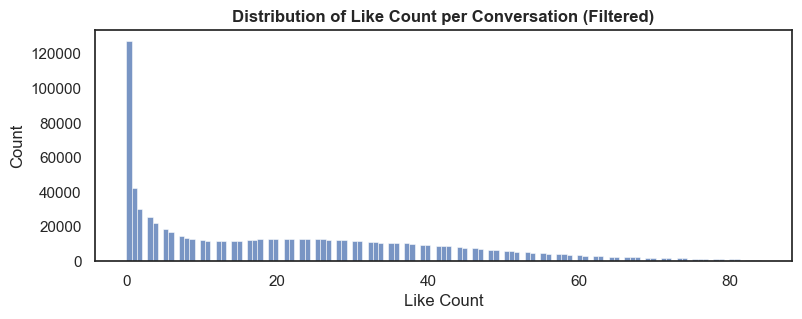

In [ ]:
fig, ax = plt.subplots(figsize=(9,3))

sns.histplot(conversation_df[conversation_df["Like Count"] < 85]["Like Count"])
plt.title("Distribution of Like Count per Conversation (Filtered)", fontsize=12, fontweight="bold")

plt.show()

In [ ]:
conversation_df.columns

Index(['id', 'creator_id', 'title', 'caption', 'media_type', 'created_at',
       'updated_at', 'mentions', 'user_name', 'recce_status', 'tags',
       'activity_id'],
      dtype='object')

In [ ]:
conversation_like_df.columns

Index(['activity_id', 'conversation_id', 'timestamp', 'like_giver_id',
       'like_receiver_id', 'recce_status'],
      dtype='object')